# 텍스트 데이터 분석 프로젝트

In [2]:
import pandas as pd

# 데이터 불러오기

In [3]:
df = pd.read_excel('review.xlsx', index_col=0)

# 형태소 분석

In [10]:
# 패키지 불러오기
import stanza

In [11]:
nlp = stanza.Pipeline('ko')

2021-04-28 15:30:20 INFO: Loading these models for language: ko (Korean):
| Processor | Package |
-----------------------
| tokenize  | kaist   |
| pos       | kaist   |
| lemma     | kaist   |
| depparse  | kaist   |

2021-04-28 15:30:20 INFO: Use device: cpu
2021-04-28 15:30:20 INFO: Loading: tokenize
2021-04-28 15:30:20 INFO: Loading: pos
2021-04-28 15:30:20 INFO: Loading: lemma
2021-04-28 15:30:21 INFO: Loading: depparse
2021-04-28 15:30:21 INFO: Done loading processors!


In [32]:
def extract(text):
    doc = nlp(text)
    for sentence in doc.sentences:
        for word in sentence.words:
            lemma = word.lemma.split('+')
            xpos = word.xpos.split('+')
            for lem, pos in zip(lemma, xpos):
                if pos[0] in 'n':
                    yield lem 

In [20]:
#def extract_nouns(text):
#    doc = nlp(text)
#    for sentence in doc.sentences:
#        for word in sentence.words:
#            lemma = word.lemma.split('+')
#            xpos = word.xpos.split('+')
#            for lem, pos in zip(lemma, xpos):
#                if pos in :
#                    yield lem 

# TDM 만들기

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
cv = CountVectorizer(max_features=500, tokenizer=extract)

In [34]:
tdm = cv.fit_transform(df['review'])

In [35]:
cv.get_feature_names()

['%',
 '1',
 '10',
 '100',
 '15',
 '1kg',
 '2',
 '2.5',
 '200',
 '250',
 '3',
 '30',
 '30%',
 '300',
 '4',
 '5',
 '500',
 '6',
 '7',
 '8',
 '9',
 'g',
 'kg',
 'ml',
 'wpi',
 '~',
 'ㅋㅋ',
 'ㅎㅎ',
 'ㅠㅠ',
 '가',
 '가격',
 '가격대',
 '가능',
 '가루',
 '가성',
 '가성비',
 '가지',
 '감사',
 '갑',
 '강추',
 '개',
 '개월',
 '개인',
 '거',
 '거기',
 '거부감',
 '거품',
 '걱정',
 '건강',
 '건건',
 '걸쭉',
 '것',
 '게',
 '결과',
 '경우',
 '계열',
 '고',
 '고민',
 '고소',
 '골든',
 '구매',
 '구입',
 '굿',
 '궁금',
 '그',
 '그거',
 '그것',
 '근육',
 '근육량',
 '근육통',
 '글루타민',
 '기간',
 '기대',
 '기본',
 '기분',
 '기존',
 '기준',
 '깔끔',
 '깔끔하',
 '끝',
 '끝맛',
 '나',
 '남',
 '내',
 '내증',
 '내추럴',
 '내츄럴',
 '냄새',
 '네',
 '네츄럴',
 '년',
 '녹차',
 '녹차맛',
 '느끼',
 '느낌',
 '는',
 '다',
 '다른맛',
 '다른제품',
 '다양',
 '다음',
 '다음번',
 '다이어트',
 '다행',
 '단맛',
 '단백',
 '단백질',
 '단점',
 '달',
 '달달',
 '달콤',
 '닭가슴살',
 '담',
 '대란',
 '대부분',
 '대비',
 '대신',
 '대용',
 '대용량',
 '더웨이',
 '덩어리',
 '도',
 '도움',
 '도전',
 '도착',
 '두',
 '두번',
 '두유',
 '둘',
 '둘다',
 '뒤',
 '득근',
 '들',
 '듯',
 '등',
 '딸기',
 '딸기맛',
 '딸기우유',
 '딸기우유맛',
 '딸기크림',
 '때',
 '때문',
 '라

In [36]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

In [37]:
word_count.sort_values('빈도', ascending=False)

,단어,빈도
159,맛,3362
462,프로틴,758
177,물,757
60,구매,750
313,운동,704
...,...,...
351,익숙,17
485,호두마루,17
31,가격대,17
295,얼마,17


In [ ]:
word_count = 

# 단어 구름

In [38]:
from wordcloud import WordCloud

In [39]:
count_dic = dict(zip(word_count['단어'], word_count['빈도']))

In [40]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()

In [41]:
wc = WordCloud(font_path='C:/Windows/Fonts/NanumGothic.ttf',
               background_color='white',
               max_words=50,
               width=400, height=300)

In [42]:
cloud = wc.generate_from_frequencies(count_dic)

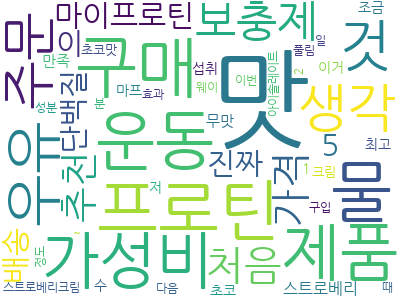

In [43]:
cloud.to_image()

# 단어별 총빈도

In [48]:
word_count = pd.DataFrame(
    {
        '단어':cv.get_feature_names(),
        '빈도':tdm.sum(axis=0).flat
    })


In [51]:
word_count.sort_values('빈도' ,ascending=False)

,단어,빈도
146,맛도,486
153,맛이,360
80,너무,346
150,맛은,314
378,정말,284
...,...,...
317,연한,15
319,예정입니다,15
332,운동하면서,15
115,두번째,15


# TF-IDF

In [64]:
df= pd.read_excel('reviews.xlsx', index_col=0)

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
tfidf = TfidfVectorizer(max_features=500)

In [71]:
tdm = tfidf.fit_transform(df['review'])

In [72]:
word_count = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도' : tdm.sum(axis=0).flat
})

In [75]:
word_count.sort_values('빈도',ascending=False)

,단어,빈도
146,맛도,113.557806
22,가성비,86.758129
80,너무,82.934613
392,좋습니다,74.400776
153,맛이,72.769528
...,...,...
238,보충제에,2.889230
2,30,2.704052
5,e9na,2.370262
477,한국,2.363642


In [ ]:
# 기존의 TDm에서 변환하기 # countvectorizer 만든 tdm을 idfㄹ 변환하기

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

In [79]:
cv = CountVectorizer(max_features=500)

In [80]:
tdm2 = cv.fit_transform(df['review'])

In [81]:
from sklearn.feature_extraction.text import TfidfTransformer

In [82]:
trans = TfidfTransformer()

In [83]:
tdm3 = trans.fit_transform(tdm2)

In [84]:
import numpy as np

In [85]:
np.allclose(tdm.A, tdm3.A)

True

# 특정 품사로 단어 문서 행렬 만들기

In [86]:
def extract_nv(text):
    words= []
    doc = nlp(text)
    for token in doc:
        if token.tag_[0] in'NV':
            words.append(token.lemma_)
    return words

In [ ]:
cv = CountVectorizer(max_features=500, tokenizer=extract_nv)